**FIRST ML MODEL**

Load Dataset

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


DATA SEPARATION

In [4]:
y= df['logS']
x=df.drop('logS', axis=1 )
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=100)

In [14]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
249,0.67150,89.094,1.0,0.000000
189,2.85164,157.216,0.0,0.833333
580,3.99540,269.127,2.0,0.705882
288,1.41490,102.177,3.0,0.000000
365,1.88920,120.151,1.0,0.666667
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [15]:
y_train

249   -0.620
189   -1.940
580   -3.953
288   -0.720
365   -1.280
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 938, dtype: float64

**Model Building**

Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

APPLYING MODEL TO MAKE PREDICTION

In [7]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [ ]:
y_test_pred

**EVALUATE MODEL**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_train_r2 = r2_score(y_train, y_train_pred)

lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

In [11]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.006924943373551
LR R2 (Train):  0.7653923830955514
LR MSE (Test):  1.0230618336334365
LR R2 (Test):  0.7888185698096595


In [14]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse , lr_test_r2]).transpose()

lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [15]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.006925,0.765392,1.023062,0.788819


**DATA VIZUALIZATIONA**

In [24]:
import matplotlib.pyplot as plt
import numpy as np



Text(0.5, 0, 'Experimental LogS')

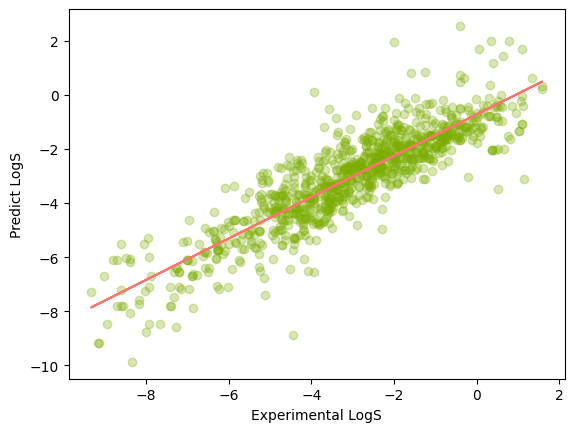

In [29]:
plt.scatter(x=y_train, y=y_train_pred, c='#7CAE00' , alpha=0.3)

z=np.polyfit(y_train, y_train_pred, 1)
p=np.poly1d(z)

plt.plot(y_train , p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

